# Drills - Basic Clustering

## Drill: More clusters?


by: Melissa N 

In [45]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline


from IPython.display import display
import time

In [46]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

## With k = 2 

In [47]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

Runtime for KMeans: 0.03168199999999999 seconds


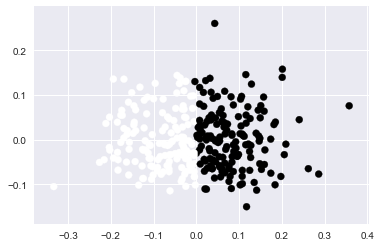

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99


In [48]:
start_time = time.clock()

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

print('Runtime for KMeans: '+'%s seconds'% (time.clock() - start_time))


# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

None of the clusters seems to be good.

In [49]:
start_time = time.clock()

# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

print('Runtime for MiniBatchKMeans: '+'%s seconds'% (time.clock() - start_time))

# Check the MiniBatch model against our earlier one.
print('\nComparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Runtime for MiniBatchKMeans: 0.020336999999999605 seconds

Comparing k-means and mini batch k-means solutions:
col_0    0    1
row_0          
0        0  141
1      149   13


## With k = 4 

Runtime for KMeans: 0.10800199999999904 seconds


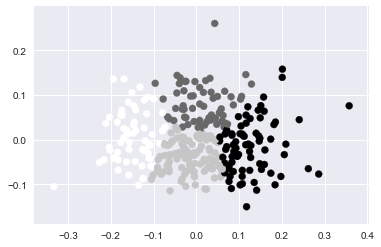

In [57]:
start_time = time.clock()

# Calculate predicted values.
y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X_pca)

print('Runtime for KMeans: '+'%s seconds'% (time.clock() - start_time))


# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

In [58]:
# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y, y_pred))

Comparing k-means clusters against the data:
col_0   0   1   2   3
row_0                
0      40  37  42  20
1      21  67  20  56


Cluster 3 seems to be good. 

In [59]:
start_time = time.clock()

# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=4,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

print('Runtime for MiniBatchKMeans: '+'%s seconds'% (time.clock() - start_time))

# Check the MiniBatch model against our earlier one.
print('\nComparing mini batch k-means solutions:')
print(pd.crosstab(y, predict_mini))

Runtime for MiniBatchKMeans: 0.04164399999999979 seconds

Comparing k-means and mini batch k-means solutions:
col_0   0   1   2   3
row_0                
0      62  40  23  14
1      38  26  66  34


Cluster 3 and 2 seem to have good result. 

In [60]:
# Check the MiniBatch model against our earlier one.
print('\nComparing k-means and mini batch k-means solutions:')
print(pd.crosstab(y_pred, predict_mini))


Comparing k-means and mini batch k-means solutions:
col_0   0   1   2   3
row_0                
0      61   0   0   0
1      34   5  65   0
2       5  57   0   0
3       0   4  24  48


## With k= 8

Runtime for KMeans: 0.09727799999999931 seconds


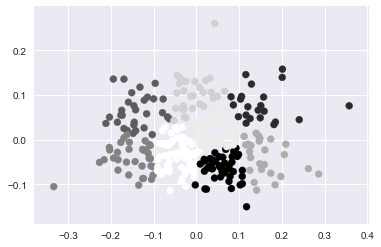

Comparing k-means clusters against the data:
col_0   0   1   2   3   4   5   6   7
row_0                                
0      32  22  17   5  19  24  12   8
1      35  29  12  20  15   6  10  37


In [61]:
start_time = time.clock()

# Calculate predicted values.
y_pred = KMeans(n_clusters=8, random_state=42).fit_predict(X_pca)

print('Runtime for KMeans: '+'%s seconds'% (time.clock() - start_time))


# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y, y_pred))

Cluster 3, 5 and 7 are pretty good 

In [62]:
start_time = time.clock()

# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=8,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

print('Runtime for MiniBatchKMeans: '+'%s seconds'% (time.clock() - start_time))

# Check the MiniBatch model against our earlier one.
print('\nComparing mini batch k-means solutions:')
print(pd.crosstab(y, predict_mini))

Runtime for MiniBatchKMeans: 0.026351999999999265 seconds

Comparing mini batch k-means solutions:
col_0   0   1   2  3   4   5   6   7
row_0                               
0      21  31  10  2  20  19  21  15
1      14  40  45  2  21  27   5  10


Cluster 3 is not good.   

In [63]:
# Check the MiniBatch model against our earlier one.
print('\nComparing k-means and mini batch k-means solutions:')
print(pd.crosstab(y_pred, predict_mini))


Comparing k-means and mini batch k-means solutions:
col_0   0   1   2  3   4   5   6   7
row_0                               
0       6  54   0  0   7   0   0   0
1       2   1   4  0   0  43   0   1
2      23   0   0  0   0   0   0   6
3       0   0  25  0   0   0   0   0
4       0   0   0  0  33   0   1   0
5       4   0   0  0   1   0  25   0
6       0   0   0  4   0   0   0  18
7       0  16  26  0   0   3   0   0


## With k = 12 

Runtime for KMeans: 0.12811999999999912 seconds


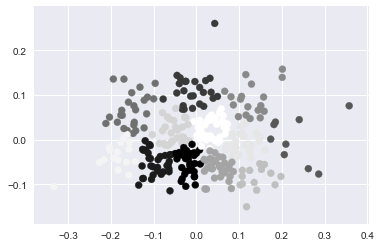

Comparing k-means clusters against the data:
col_0  0   1   2   3   4   5   6   7   8   9   10  11
row_0                                                
0      18  12   8  21   2   6  12  20   1  14  11  14
1      22   5  20   9  12  26   6   5   8  11  21  19


In [67]:
start_time = time.clock()

# Calculate predicted values.
y_pred = KMeans(n_clusters=12, random_state=42).fit_predict(X_pca)

print('Runtime for KMeans: '+'%s seconds'% (time.clock() - start_time))


# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y, y_pred))

Cluster 2, 3, 5 and 7 seem to be good.

In [55]:
start_time = time.clock()

# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=12,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

print('Runtime for MiniBatchKMeans: '+'%s seconds'% (time.clock() - start_time))

# Check the MiniBatch model against our earlier one.
print('\nComparing mini batch k-means solutions:')
print(pd.crosstab(y, predict_mini))

Runtime for MiniBatchKMeans: 0.033051000000000386 seconds

Comparing k-means and mini batch k-means solutions:
col_0  0   1   2   3   4   5   6   7   8   9   10  11
row_0                                                
0       0   0   1   0   0   0  10   0   4   0   0   0
1       0   0   9   0   5  25   0   0   0   0   0   0
2       0   0   0   0   0   6   0   0   0   0   0  24
3       0   0   0   0   0   0   7   0   0   2   0   0
4       1   0   0  12   0   0   0   0   0   5   0   0
5      39   0   5   0   0   1   1   0   0   0   0   0
6       0   0   0   0   0   0   0   0   0  18   0   0
7       0   0  13   0   9   0   0   0   5   0   0   0
8       0   0   0  18   0   0   0   0   0   0   4   9
9       0   2   0   0   0   0   0   0   0   0  27   0
10      0  15   0   0   0   0   0   9   0   0   1   0
11      0   0   0   0   0   0   0  16   0   0   0   0


In [65]:
# Check the MiniBatch model against our earlier one.
print('\nComparing k-means and mini batch k-means solutions:')
print(pd.crosstab(y_pred, predict_mini))


Comparing k-means and mini batch k-means solutions:
col_0   0   1   2  3   4   5   6   7
row_0                               
0       1   1   0  0   0  38   0   0
1       0   0   0  0  16   0   1   0
2       0   0  21  0   0   5   0   2
3      14  14   0  0   2   0   0   0
4       0   0  14  0   0   0   0   0
5       0  14  15  0   0   3   0   0
6       0   0   0  2   0   0   0  16
7       0   0   0  0   0   0  25   0
8       0   0   5  2   0   0   0   2
9      20   0   0  0   0   0   0   5
10      0   9   0  0  23   0   0   0
11      0  33   0  0   0   0   0   0
